In [104]:
import datetime
import math
import numpy as np
import pandas as pd

In [105]:
dados=pd.read_csv('Datastes_Criados/Predict_lOS_CI_ex_an_fa.csv', sep='\t')

In [106]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8566 entries, 0 to 8565
Data columns (total 48 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   INT_EPISODIO         8566 non-null   int64  
 1   DTA_NASCIMENTO       8566 non-null   object 
 2   SEXO                 8566 non-null   int64  
 3   NUM_TRANSFERENCIA    8566 non-null   int64  
 4   COD_ESPECIALIDADE    8566 non-null   int64  
 5   DES_ESPECIALIDADE    8566 non-null   object 
 6   MOTIVO_ENTRADA       8566 non-null   object 
 7   COD_DIAGNOSTICO_ADM  8566 non-null   object 
 8   DTA_ENTRADA          8566 non-null   object 
 9   HORA_ENTRADA         8566 non-null   int64  
 10  DTA_SAIDA            8566 non-null   object 
 11  HORA_SAIDA           8566 non-null   float64
 12  sequencia            8566 non-null   object 
 13  proximo              8566 non-null   int64  
 14  des_sequencia        8566 non-null   object 
 15  des_proximo          8566 non-null   o

In [107]:
dados = dados.sort_values(["INT_EPISODIO", "teste"])

In [108]:
dados.columns

Index(['INT_EPISODIO', 'DTA_NASCIMENTO', 'SEXO', 'NUM_TRANSFERENCIA',
       'COD_ESPECIALIDADE', 'DES_ESPECIALIDADE', 'MOTIVO_ENTRADA',
       'COD_DIAGNOSTICO_ADM', 'DTA_ENTRADA', 'HORA_ENTRADA', 'DTA_SAIDA',
       'HORA_SAIDA', 'sequencia', 'proximo', 'des_sequencia', 'des_proximo',
       'LOS', 'IDADE', 'afluencia', 'DTA_INTERNAMENTO', 'HORA_INTERNAMENTO',
       'TIPO_ADMISSAO', 'COD_PROVENIENCIA', 'HORAS_INT', 'DIAS_INT',
       'LOS_ANTERIOR', 'teste', 'DTA_ACTO_MEDICO', 'QTD_EXAMES', 'seq_exames',
       'Novos Exames', 'Exames Repetidos', 'ACC_EXAMES', 'Data_Uso_x',
       'DTA_ANALISE', 'QTD_ANALISES', 'seq_analises', 'Novas Analises',
       'Analises Repetidas', 'ACC_ANALISES', 'Data_Uso_y', 'DATAINICIO',
       'FARMACO', 'seq_farmacos', 'Novos Farmacos', 'Farmacos Repetidos',
       'ACC_Farmacos', 'Data_Uso'],
      dtype='object')

In [109]:
final=dados

In [110]:
final=final[final.LOS.notnull()]
h=final['LOS']

In [111]:
from sklearn.ensemble import IsolationForest
h=h.values.reshape(-1,1)
clf = IsolationForest(random_state=0).fit(h)

In [112]:
final['Outlier']=clf.predict(h)

In [113]:
final['Outlier'].value_counts()

 1    7189
-1    1377
Name: Outlier, dtype: int64

In [114]:
final[final['Outlier']==-1]['LOS']

71        67140.0
72        67140.0
110        2640.0
115       57960.0
116       57960.0
          ...    
8549    2947260.0
8550    2947260.0
8551    2947260.0
8559      52980.0
8560      52980.0
Name: LOS, Length: 1377, dtype: float64

In [115]:
import math

def arrendondar(t):
    return math.ceil(t/3600/24)

final['LOS Dia']=final['LOS'].apply(arrendondar)

In [116]:
final['LOS Dia'].value_counts()

2     874
4     650
3     630
8     522
5     510
6     499
9     407
7     405
1     386
15    292
17    282
13    271
14    258
10    243
18    221
12    221
11    217
16    198
20    165
42    127
19     97
22     89
21     85
27     81
25     78
78     78
32     64
30     62
61     61
28     58
53     54
54     54
51     52
23     48
37     37
34     35
35     35
33     33
31     31
29     30
26     26
Name: LOS Dia, dtype: int64

In [118]:
final['DTA_SAIDA']=pd.to_datetime(final['DTA_SAIDA'])
final['teste']=pd.to_datetime(final['teste'])

In [119]:
final['LOS_res']=(final['DTA_SAIDA']-final['teste']).apply(lambda x: x.total_seconds())
final['LOS_res']=final['LOS_res']/3600/24+1

In [120]:
final['LOS_res'].value_counts()

1.0     1456
2.0     1414
3.0      985
4.0      771
5.0      609
        ... 
70.0       1
76.0       1
74.0       1
67.0       1
75.0       1
Name: LOS_res, Length: 78, dtype: int64

In [121]:
final=final[final['Outlier']==1]

In [122]:
def classe_target(x):
    if x <=3:
        return 1
    else:
        return x

final['Classe_LOS_RES']=final['LOS_res'].apply(classe_target)

<ipython-input-122-6271b6b5fba7>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final['Classe_LOS_RES']=final['LOS_res'].apply(classe_target)


In [123]:
dataset=pd.read_csv('Datastes_Criados/INT_CI_Afluencias_LOS.csv', sep=',')
datas=[]
for x in dataset.iloc:
    e=pd.date_range(start =x['DTA_ENTRADA'], 
            end =x['DTA_SAIDA'])
    datas.append(e)
dataset['teste']=datas
dataset=dataset.explode('teste')
afl=[]
for x in final['teste'].iloc:
    z=len(dataset[dataset['teste']==x])
    afl.append(z)
final['AFL']=afl

<ipython-input-123-71f9e8fda89f>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final['AFL']=afl


In [124]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7189 entries, 0 to 8565
Data columns (total 53 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   INT_EPISODIO         7189 non-null   int64         
 1   DTA_NASCIMENTO       7189 non-null   object        
 2   SEXO                 7189 non-null   int64         
 3   NUM_TRANSFERENCIA    7189 non-null   int64         
 4   COD_ESPECIALIDADE    7189 non-null   int64         
 5   DES_ESPECIALIDADE    7189 non-null   object        
 6   MOTIVO_ENTRADA       7189 non-null   object        
 7   COD_DIAGNOSTICO_ADM  7189 non-null   object        
 8   DTA_ENTRADA          7189 non-null   object        
 9   HORA_ENTRADA         7189 non-null   int64         
 10  DTA_SAIDA            7189 non-null   datetime64[ns]
 11  HORA_SAIDA           7189 non-null   float64       
 12  sequencia            7189 non-null   object        
 13  proximo              7189 non-nul

In [125]:
mot=[]
for x in final.iloc:
    if x['MOTIVO_ENTRADA']=='U':
        mot.append('1')
    else:
        if x['MOTIVO_ENTRADA']=='T':
            mot.append('2')
        else:
            mot.append('3')
final['MOTIVO']=mot

<ipython-input-125-c74c0a67746a>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final['MOTIVO']=mot


In [127]:
d_s = final['COD_DIAGNOSTICO_ADM'].unique()
contador = 0
id_dig = []

for y in range(final['COD_DIAGNOSTICO_ADM'].nunique()):
    contador = contador + 1
    id_dig.append(contador)
    y = y + 1
    
seq_dig=pd.DataFrame({'COD_DIAGNOSTICO_ADM':d_s, 'ID_DIG':id_dig})
final = pd.merge(final, seq_dig, on = 'COD_DIAGNOSTICO_ADM', how='left')

In [128]:
#classificação
X = final[['IDADE','AFL','ID_DIG','SEXO',
        'TIPO_ADMISSAO','MOTIVO','COD_PROVENIENCIA','LOS_ANTERIOR','QTD_EXAMES','QTD_ANALISES','FARMACO',
        'Novos Exames','Novos Farmacos','Novas Analises','Exames Repetidos','Analises Repetidas','Farmacos Repetidos','ACC_EXAMES',
        'ACC_ANALISES','ACC_Farmacos']]
y_med = final['Classe_LOS_RES']

In [129]:
X['Novos Exames']=X['Novos Exames'].replace(np.nan,0)
X['Novos Farmacos']=X['Novos Farmacos'].replace(np.nan,0)                   
X['Novas Analises']=X['Novas Analises'].replace(np.nan,0)
                      
X['Exames Repetidos']=X['Exames Repetidos'].replace(np.nan,0)
X['Analises Repetidas']=X['Analises Repetidas'].replace(np.nan,0)
X['Farmacos Repetidos']=X['Farmacos Repetidos'].replace(np.nan,0)

X['ACC_EXAMES']=X['ACC_EXAMES'].replace(np.nan,0)
X['ACC_ANALISES']=X['ACC_ANALISES'].replace(np.nan,0)
X['ACC_Farmacos']=X['ACC_Farmacos'].replace(np.nan,0)

<ipython-input-129-814a350ee41f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Novos Exames']=X['Novos Exames'].replace(np.nan,0)
<ipython-input-129-814a350ee41f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Novos Farmacos']=X['Novos Farmacos'].replace(np.nan,0)
<ipython-input-129-814a350ee41f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda

In [130]:
from collections import defaultdict
temp = defaultdict(lambda: len(temp))
X['TIPO_ADMISSAO'] = [temp[ele] for ele in X['TIPO_ADMISSAO']]

<ipython-input-130-11e8fd363777>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['TIPO_ADMISSAO'] = [temp[ele] for ele in X['TIPO_ADMISSAO']]


In [131]:
X=X.replace(np.nan,-1)

In [132]:
X_med=X
X_quartil=X

In [133]:
from imblearn.over_sampling import RandomOverSampler 
over_sampler = RandomOverSampler() 
X_med, y_med = over_sampler.fit_resample(X_med, y_med) 

In [134]:
X_med

,IDADE,AFL,ID_DIG,SEXO,TIPO_ADMISSAO,MOTIVO,COD_PROVENIENCIA,LOS_ANTERIOR,QTD_EXAMES,QTD_ANALISES,FARMACO,Novos Exames,Novos Farmacos,Novas Analises,Exames Repetidos,Analises Repetidas,Farmacos Repetidos,ACC_EXAMES,ACC_ANALISES,ACC_Farmacos
0,86,6,1,2,0,2,2,717000.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,86,8,1,2,0,2,2,717000.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,86,8,1,2,0,2,2,717000.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,86,6,1,2,0,2,2,717000.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,86,5,1,2,0,2,2,717000.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68110,68,7,1,1,1,2,1,323062.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
68111,68,7,1,1,1,2,1,323062.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
68112,65,9,1,1,1,1,1,0.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
68113,73,8,1,1,1,2,1,655800.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [135]:
y_med.value_counts()

4.0     3585
12.0    3585
6.0     3585
19.0    3585
9.0     3585
5.0     3585
7.0     3585
16.0    3585
13.0    3585
1.0     3585
8.0     3585
11.0    3585
17.0    3585
18.0    3585
14.0    3585
21.0    3585
20.0    3585
15.0    3585
10.0    3585
Name: Classe_LOS_RES, dtype: int64

In [136]:
y_med.value_counts()

4.0     3585
12.0    3585
6.0     3585
19.0    3585
9.0     3585
5.0     3585
7.0     3585
16.0    3585
13.0    3585
1.0     3585
8.0     3585
11.0    3585
17.0    3585
18.0    3585
14.0    3585
21.0    3585
20.0    3585
15.0    3585
10.0    3585
Name: Classe_LOS_RES, dtype: int64

In [137]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

from numpy import mean
from numpy import absolute
from numpy import sqrt
from numpy import std

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score

# CLASSIFICAÇÃO

In [138]:
model = DecisionTreeClassifier(max_depth=45, random_state=101)
model2 = RandomForestClassifier(max_depth=40,random_state=42)
model4= GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, random_state=0)

In [139]:
from sklearn.model_selection import cross_val_predict

predicted = cross_val_predict(model, X_med, y_med, cv=cv)

In [140]:
predicted2 = cross_val_predict(model2, X_med, y_med, cv=cv)

In [141]:
cohen_kappa_score(y_med, predicted)

0.9260344026034403

In [142]:
cohen_kappa_score(y_med, predicted2)

0.9411901441190144

In [143]:
accuracy_score(y_med, predicted)

0.9299273287822065

In [144]:
accuracy_score(y_med, predicted2)

0.9442853996916979

In [145]:
f1_score(y_med, predicted, average='macro')

0.925870786128295

In [146]:
f1_score(y_med, predicted2, average='macro')

0.9437469855725743

In [87]:
print(classification_report(y_med, predicted))

              precision    recall  f1-score   support

         1.0       0.98      0.48      0.65      3585
         4.0       0.87      0.94      0.90      3585
         5.0       0.91      0.96      0.93      3585
         6.0       0.93      0.96      0.94      3585
         7.0       0.91      0.95      0.93      3585
         8.0       0.93      0.95      0.94      3585
         9.0       0.94      0.96      0.95      3585
        10.0       0.95      0.95      0.95      3585
        11.0       0.91      0.98      0.94      3585
        12.0       0.93      0.96      0.95      3585
        13.0       0.96      0.95      0.96      3585
        14.0       0.94      0.94      0.94      3585
        15.0       0.96      0.95      0.95      3585
        16.0       0.99      0.94      0.96      3585
        17.0       0.95      0.92      0.93      3585
        18.0       0.84      0.97      0.90      3585
        19.0       0.98      1.00      0.99      3585
        20.0       0.93    

In [92]:
print(classification_report(y_med, predicted2))

              precision    recall  f1-score   support

         1.0       0.97      0.74      0.84      3585
         4.0       0.92      0.93      0.92      3585
         5.0       0.94      0.96      0.95      3585
         6.0       0.96      0.96      0.96      3585
         7.0       0.94      0.95      0.94      3585
         8.0       0.96      0.95      0.95      3585
         9.0       0.96      0.96      0.96      3585
        10.0       0.97      0.96      0.96      3585
        11.0       0.92      0.97      0.95      3585
        12.0       0.95      0.96      0.95      3585
        13.0       0.96      0.96      0.96      3585
        14.0       0.95      0.94      0.95      3585
        15.0       0.96      0.95      0.95      3585
        16.0       0.99      0.94      0.97      3585
        17.0       0.95      0.92      0.93      3585
        18.0       0.84      0.97      0.90      3585
        19.0       0.98      1.00      0.99      3585
        20.0       0.93    

In [93]:
model.fit(X_med, y_med)
model.feature_importances_

array([0.23594105, 0.11986228, 0.00518497, 0.03179791, 0.00615733,
       0.02503724, 0.00797427, 0.16120701, 0.02276531, 0.055756  ,
       0.        , 0.02370777, 0.        , 0.04525676, 0.01297333,
       0.04561622, 0.        , 0.0623626 , 0.13839993, 0.        ])

In [147]:
model2.fit(X_med, y_med)
model2.feature_importances_

array([1.99588198e-01, 1.40677167e-01, 4.67823516e-03, 3.29200172e-02,
       6.04665040e-03, 2.60121485e-02, 8.97882115e-03, 1.36827446e-01,
       2.59469616e-02, 7.96308791e-02, 1.91885302e-06, 2.04404192e-02,
       2.83464258e-06, 5.29580236e-02, 1.19224667e-02, 5.89689195e-02,
       0.00000000e+00, 5.94509421e-02, 1.34935753e-01, 1.21985850e-05])

<BarContainer object of 20 artists>

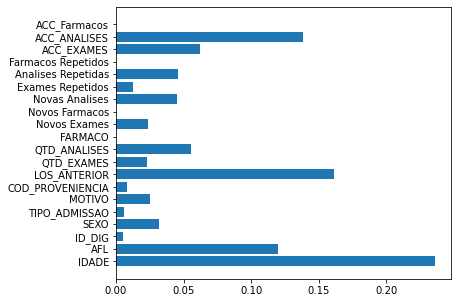

In [94]:
from matplotlib import pyplot as plt

plt.figure(figsize=(6,5))
plt.barh(X.columns, model.feature_importances_)


<BarContainer object of 20 artists>

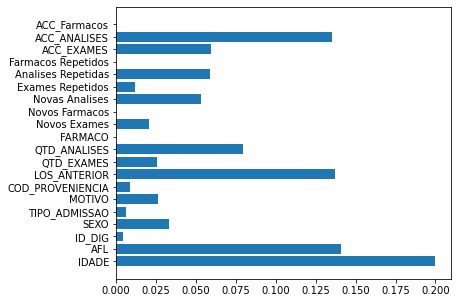

In [148]:
from matplotlib import pyplot as plt

plt.figure(figsize=(6,5))
plt.barh(X.columns, model2.feature_importances_)

In [98]:
t=X_med

In [99]:
#predict=cross_val_predict(model, X_med, y_med, cv=cv)
t['predict']=predicted
t['real']=y_med

In [100]:
t

,IDADE,AFL,ID_DIG,SEXO,TIPO_ADMISSAO,MOTIVO,COD_PROVENIENCIA,LOS_ANTERIOR,QTD_EXAMES,QTD_ANALISES,...,Novos Farmacos,Novas Analises,Exames Repetidos,Analises Repetidas,Farmacos Repetidos,ACC_EXAMES,ACC_ANALISES,ACC_Farmacos,predict,real
0,86,6,1,2,0,2,2,717000.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,6.0
1,86,8,1,2,0,2,2,717000.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,5.0
2,86,8,1,2,0,2,2,717000.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,4.0
3,86,6,1,2,0,2,2,717000.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,1.0
4,86,5,1,2,0,2,2,717000.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68110,63,8,1,2,1,2,1,105039.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0,21.0
68111,68,7,1,1,1,2,1,323062.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0,21.0
68112,65,9,1,1,1,1,1,0.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0,21.0
68113,73,8,1,1,1,2,1,655800.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0,21.0


In [95]:
predictions = model.predict_proba(X_med)
print(predictions)

[[0.1        0.         0.         ... 0.         0.         0.        ]
 [0.         0.38461538 0.61538462 ... 0.         0.         0.        ]
 [0.         0.38461538 0.61538462 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         1.        ]
 [0.         0.         0.         ... 0.         0.33742911 0.66257089]
 [0.         0.         0.         ... 0.         0.         1.        ]]


In [96]:
roc_auc_score(y_med, predictions, multi_class='ovo')

0.999651467043519

In [97]:
prob=[]

for d in predictions:
    maior_prob=0
    for y in d: 
        if y>maior_prob:
            maior_prob=y
    prob.append(maior_prob)

In [101]:
t['Grau Confiança']= prob

In [103]:
t[['predict','real','Grau Confiança']]

,predict,real,Grau Confiança
0,6.0,6.0,0.900000
1,5.0,5.0,0.615385
2,5.0,4.0,0.615385
3,6.0,1.0,0.900000
4,10.0,1.0,1.000000
...,...,...,...
68110,21.0,21.0,1.000000
68111,21.0,21.0,1.000000
68112,21.0,21.0,1.000000
68113,21.0,21.0,0.662571
